In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("attack_pair.csv")

In [3]:
df.head()

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.06.09,2,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018.06.08,3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,NaN,2 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018.06.04,4,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,NaN,"Tiger shark, 3m",http://sharkattackfile.net/spreadsheets/pdf_di...


1.
¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [3]:
sex= df["sex_"].value_counts()
sex

M      4939
F       619
M         2
N         2
lli       1
.         1
Name: sex_, dtype: int64

In [38]:
sex.size

6

<BarContainer object of 6 artists>

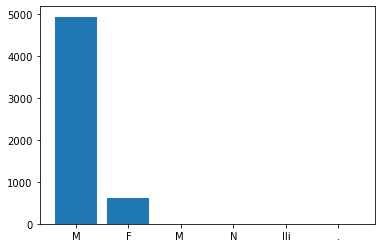

In [ ]:
plt.figure()
x = sex.index
y = sex
plt.bar(x,y)

In [6]:
x = df["sex_"].unique()
x

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [ ]:
x = df["sex_"].unique() #PENDIENTE BUSCAR SOLUCIÓN CON HISTOGRAMA
plt.hist(x= x)
plt.show()

EJERCICIO 2: ¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. Para eso tendréis que usar el parámetro autopct, aquí algo de documentación.

In [8]:
nulos= df.isnull().sum()
nulos

case_number       1
unnamed:_0        0
year              0
type              4
country          40
area            408
location        488
activity        511
name            200
sex_            550
age            2666
time           3180
species_       2705
href              0
dtype: int64

In [9]:
for i in range(nulos.size):
    nulos [i] = nulos [i]*100/6114
print(nulos)

case_number     0
unnamed:_0      0
year            0
type            0
country         0
area            6
location        7
activity        8
name            3
sex_            8
age            43
time           52
species_       44
href            0
dtype: int64


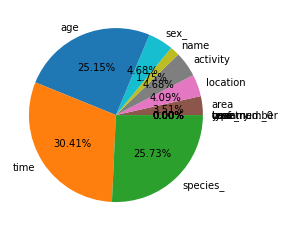

In [10]:
plt.figure()
plt.pie(nulos.values,labels=nulos.index,autopct='%1.2f%%')
plt.show()

3.
¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6114 entries, 0 to 6113
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case_number  6113 non-null   object 
 1   unnamed:_0   6114 non-null   int64  
 2   year         6114 non-null   float64
 3   type         6110 non-null   object 
 4   country      6074 non-null   object 
 5   area         5706 non-null   object 
 6   location     5626 non-null   object 
 7   activity     5603 non-null   object 
 8   name         5914 non-null   object 
 9   sex_         5564 non-null   object 
 10  age          3448 non-null   object 
 11  time         2934 non-null   object 
 12  species_     3409 non-null   object 
 13  href         6114 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 668.8+ KB


In [68]:
df_copia=df.copy()
df_elim=df_copia.drop(["unnamed:_0","year"],axis=1)

In [69]:
dicc={}
for i in df_elim:
    unicos=df[i].unique().size
    dicc.update({i:unicos})
dicc    

{'case_number': 6114,
 'type': 9,
 'country': 202,
 'area': 792,
 'location': 4021,
 'activity': 1485,
 'name': 5119,
 'sex_': 7,
 'age': 157,
 'time': 367,
 'species_': 1530,
 'href': 6099}

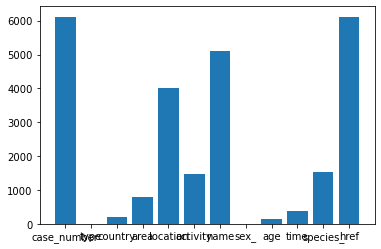

In [67]:
plt.figure()
x=dicc.keys()
y=dicc.values()
plt.bar(x,y)
plt.show()

4.
Filtrad los datos para quedarnos solo con los datos de USA.

¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.

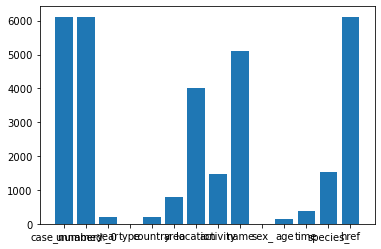

5.
Filtrad los datos para Spain:

¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.